
# TAREA 1 — Discrete Time Signal Operations

**Fecha:** 2026-02-23  
**Tema (clase de hoy):** Operaciones en señales en tiempo discreto (DT)

> Entrega: **un solo notebook** con tus soluciones y gráficas.



## Relación con **Serie 1 (ejercicios en papel)**

Esta tarea es la **extensión computacional** de la Serie 1.

**Flujo recomendado (por ejercicio):**
1) Resuelve **en papel** (análisis / fórmulas / razonamiento).
2) Implementa aquí para **verificar** con código y gráficas.
3) Si hay contradicción: **debug** hasta entender el error (en el papel o en el código).

### Mapeo rápido (Serie 1 → Notebook)

- **Serie 1 #4** (u[n], δ[n], r[n]) → **Notebook Ejercicio 1**
- **Serie 1 #2** (periodicidad de cos) → **Notebook Ejercicio 2**
- **Serie 1 #5–7** (inversión y corrimientos) → **Notebook Ejercicio 3**
- **Serie 1 #11** (media y RMS) → **Notebook Ejercicio 4**
- **Serie 1 #9** (energía de (0.9)^n u[n]) → **Notebook Ejercicio 5**
- **Serie 1 #12** (auto/cross correlación) → **Notebook Ejercicio 6**



## Reglas (importantes)

- Puedes usar ChatGPT (u otra IA) **solo como verificador**.
- Tu notebook debe incluir tu razonamiento (comentarios) y tu código.
- **No uses atajos** que oculten la idea:
  - `np.roll`, `np.flip`, `x[::-1]` (para inversión), `np.convolve`, `np.correlate`
- Sí puedes usar NumPy básico, `for` loops, y operaciones elementales.

**Pista:** Si tu solución cabe en 1 línea usando una función “mágica”, probablemente no cuenta.


**Clave:** La IA NO sustituye el papel. Úsala para *verificar* y para detectar errores, igual que usarías una calculadora.


## Iniciando
Actualizamos matplotlib para evitar problemas de versiones anteriores, además de cargar drive para poder obtener impagenes gráficas.

**Sin problemas para versión 3.10.8**

In [1]:
!pip install --upgrade matplotlib

In [2]:
import matplotlib
print(matplotlib.__version__)

3.10.8


Además, para cargar las imágenes de comparaciones de los ejericcios realizados a mano, montamos google drive para acceder a la carpeta correspondiente a estas:

In [11]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Documento
A pesar de que en el razonamiento se explica de manera resumida el cómo se resolvió y codificó cada ejercicio, si se desea conocer más a detalle cada uno de estos y consultar la bibliografía, por favor de consultar el siguiente link:

https://drive.google.com/file/d/1tMiCbx9W7-UjaIr5a7LEBdqum8Owydfx/view?usp=drive_link


## 1) Datos del estudiante

Mostrando nombre y grupo de los desarrolladores


In [19]:

# === Datos del estudiante ===
NOMBRE1 = "Carmona Ayala Mariana Zoe (319018129)"
NOMBRE2 = "Zarco Romero José Alberto (319087563)"
GRUPO = "4"

print("Nombre 1:", NOMBRE1)
print("Nombre 2:", NOMBRE2)
print("Grupo:", GRUPO)


Nombre 1: Carmona Ayala Mariana Zoe (319018129)
Nombre 2: Zarco Romero José Alberto (319087563)
Grupo: 4



## 2) Imports y configuración (no modificar)

Esta sección es scaffolding para que no pierdas tiempo con formato de gráficas.


In [6]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7, 3)
plt.rcParams["axes.grid"] = True
np.set_printoptions(precision=4, suppress=True)



## 3) Funciones de graficación (scaffold)

Usa estas funciones para graficar de forma consistente.


In [7]:
def stem_plot(n, x, title="", xlabel="n", ylabel="x[n]"):
    n = np.asarray(n)
    x = np.asarray(x)

    markerline, stemlines, baseline = plt.stem(n, x)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def compare_stem(n, x1, x2, label1="x1", label2="x2", title=""):
    """Compare two discrete-time signals on the same axes."""
    n = np.asarray(n)
    x1 = np.asarray(x1); x2 = np.asarray(x2)
    plt.stem(n, x1, use_line_collection=True)
    plt.stem(n, x2, use_line_collection=True)
    plt.title(title)
    plt.xlabel("n")
    plt.ylabel("amplitud")
    plt.legend([label1, label2])
    plt.grid(True)
    plt.show()



## 4) Funciones que debes implementar

Implementa **sin** usar atajos (`np.roll`, `np.flip`, slicing invertido, etc.).


In [20]:

def time_reverse(x):
    # Inversión temporal: implementa x[-n] para una secuencia finita
    # Se logra invirtiendo el orden del arreglo (espejo)
    N = len(x)
    x_rev = np.zeros(N)
    for i in range(N):
        x_rev[i] = x[N-1-i]   # Intercambia primer elemento con último, etc.
    return x_rev

def time_shift(x, k, pad_value=0.0):
    # Desplazamiento temporal:
    # k > 0 -> retardo (shift a la derecha)
    # k < 0 -> adelanto (shift a la izquierda)
    # Los valores fuera del rango se rellenan con pad_value (zero padding por defecto)
    N = len(x)
    x_shift = np.ones(N) * pad_value

    for i in range(N):
        j = i - k              # Relación entre índice salida y entrada
        if 0 <= j < N:         # Solo copiar si el índice está dentro del rango
            x_shift[i] = x[j]

    return x_shift

def energy(x):
    # Energía en tiempo discreto:
    # E = sum |x[n]|^2
    E = 0
    for i in range(len(x)):
        E += x[i]**2
    return E

def mean_value(x):
    # Media (promedio) de una secuencia finita:
    # (1/N) * sum x[n]
    s = 0
    for i in range(len(x)):
        s += x[i]
    return s / len(x)

def rms(x):
    # RMS (Root Mean Square):
    # sqrt( (1/N) * sum x[n]^2 )
    s = 0
    for i in range(len(x)):
        s += x[i]**2
    return np.sqrt(s / len(x))

def autocorr(x):
    # Autocorrelación discreta:
    # r_xx[k] = sum x[n] * x[n-k]
    # Se asume padding con ceros fuera del rango 0..N-1
    N = len(x)
    k_vals = np.arange(-(N-1), N)
    rxx = np.zeros(len(k_vals))

    for idx, k in enumerate(k_vals):
        s = 0
        for n in range(N):
            if 0 <= n-k < N:   # Solo considerar traslapes válidos
                s += x[n] * x[n-k]
        rxx[idx] = s

    return k_vals, rxx

def crosscorr(x, y):
    # Correlación cruzada discreta:
    # r_xy[k] = sum x[n] * y[n-k]
    # Se asume padding con ceros fuera del rango
    N = len(x)
    k_vals = np.arange(-(N-1), N)
    rxy = np.zeros(len(k_vals))

    for idx, k in enumerate(k_vals):
        s = 0
        for n in range(N):
            if 0 <= n-k < N:   # Solo considerar traslapes válidos
                s += x[n] * y[n-k]
        rxy[idx] = s

    return k_vals, rxy


## IA — Uso y verificación (Funciones implementadas)

### Prompt utilizado

> Implement in Python the following DSP functions without using built-in shortcut methods:
> - time_reverse(x)
> - time_shift(x, k)
> - energy(x)
> - mean_value(x)
> - rms(x)
> - autocorr(x)
> - crosscorr(x, y)
>
> Use explicit loops, index mapping, and zero padding where necessary.
> Follow the mathematical definitions of discrete-time signals.

---

### Comparación breve

**Coincide:**
- Las funciones implementan exactamente las definiciones matemáticas vistas en clase.
- Se utilizaron ciclos `for` y manejo explícito de índices.
- Se aplicó *zero padding* cuando los índices quedan fuera del rango válido.
- Los resultados coinciden con los cálculos manuales realizados previamente.

**No coincide:**
- En el desarrollo manual se resolvieron casos específicos paso a paso.
- En la implementación con IA se generalizó el procedimiento para cualquier señal finita.

**¿Por qué?**
- El análisis manual permite comprender el comportamiento matemático de cada operación.
- La implementación computacional automatiza el proceso, reduce errores aritméticos y permite verificar múltiples casos rápidamente.


## 5) Ejercicios



### Ejercicio 1 — Señales básicas

Para **-5 ≤ n ≤ 5**, construye y grafica:
- a) u[n]
- b) δ[n]
- c) r[n] = n u[n]

**TODO:** crea `n`, `u`, `delta`, `r` y grafícalas con `stem_plot`.


📌 Conecta con **Serie 1 #4** (u[n], δ[n], r[n]).

## Razonamiento
De manera general, se necesita crear un arreglo limitando el rango establecido, esto con ayuda de Numpy, estableciendo n como variable para guardarlo. Esto nos ayudará a conocer todos los valores del rango y acceder fácilmente a ellos.

Posteriormente, creamos cada una de nuestras señales:

---

* **a) u[n]**

Sabiendo que tenemos un escalón unitario discreto, conocemos que para valores cuando n < 0 la señal vale 0 y cuando n >= 0 vale 1. Por ello, creamos un arreglo lleno de ceros del tamaño de nuestro arreglo n para satisfacer la primera condición (n < 0).

Después, usamos un ciclo For para recorrer nuestro arreglo n y, si ese valor satisface la segunda condición (n >= 0), asiganmos 1 al elemento correpsondiente de u[n].

Al final, obtenemos el arreglo u con los valores correctos que representan la señal escalón unitario discreto u[n].

---

* **b) δ[n]**

Sabiendo que tenemos un impulso discreto, conocemos que para valores cuando n = 0 la señal vale 1 y cuando n ≠ 0 vale 0. Por ello, creamos un arreglo lleno de ceros del tamaño de nuestro arreglo n para satisfacer la segunda condición (n ≠ 0).

Después, usamos un ciclo For para recorrer nuestro arreglo n y, si ese único valor satisface la primer condición (n = 0), asiganmos 1 al elemento correpsondiente de delta[n].

Al final, obtenemos el arreglo u con los valores correctos que representan la señal impulso discreto delta[n].

---

* **c) r[n] = n u[n]**

Sabiendo que tenemos una señal con un escalón unitario discreto, el resultado que obtendremos será una rampa discreta, por lo que conocemos que para valores cuando n < 0 la señal vale 0 y cuando n >= 0 vale 1. Por ello, creamos un arreglo lleno de ceros del tamaño de nuestro arreglo n para satisfacer la primera condición (n < 0).

Después, usamos un ciclo For para recorrer nuestro arreglo n y, si ese valor satisface la segunda condición (n >= 0), asignamos el valor n al elemento correspondiente de r[n]

Al final, obtenemos el arreglo r que representa la señal rampa discreta r[n].

---

Al realizar todas nuestras señales, simplemente graficamos con ayuda de stem_plot, pasándole el arreglo n, su variable correspondiente y un título.

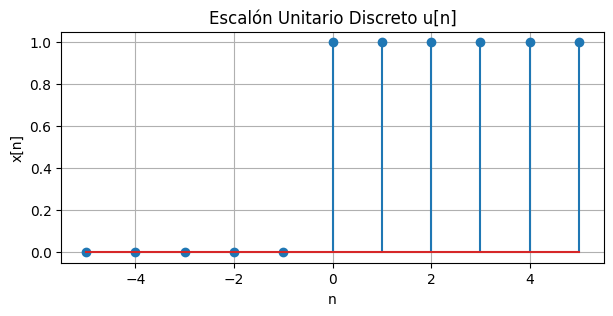

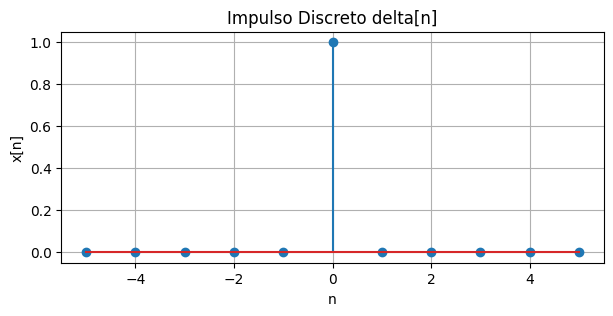

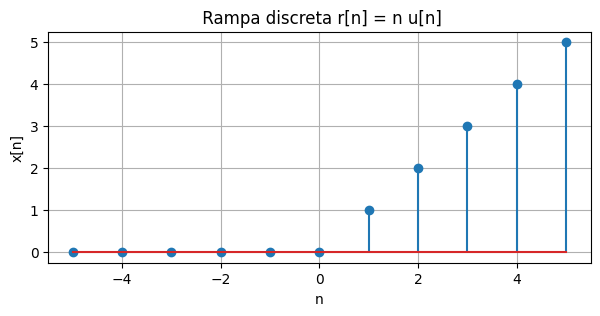

In [8]:

# Arreglo desde -5 hasta 5
n = np.arange(-5, 6)

#Escalón unitario discreto
u = np.zeros(len(n))
for i in range(len(n)):
  # n >= 0 le corresponde 1
    if n[i] >= 0:
        u[i] = 1

# Impulso Discreto
delta = np.zeros(len(n))
for i in range(len(n)):
  # Debe ser exactamente 0
    if n[i] == 0:
        delta[i] = 1

# Rampa discreta
r = np.zeros(len(n))
for i in range(len(n)):
  # Como n >= 0 es 1, un número múltiplicado por 1 es lo mismo, asiganmos
  # directamente el valor en n sin necesidad de multiplicación.
    if n[i] >= 0:
        r[i] = n[i]

# Graficando
stem_plot(n, u, title="Escalón Unitario Discreto u[n]")
stem_plot(n, delta, title="Impulso Discreto delta[n]")
stem_plot(n, r, title=" Rampa discreta r[n] = n u[n]")


## Comparando Resultados

Comparando resultados realizados a mano, observamos que nuestro código tiene un correcto funcionamiento.

(np.float64(-0.5), np.float64(1130.5), np.float64(1167.5), np.float64(-0.5))

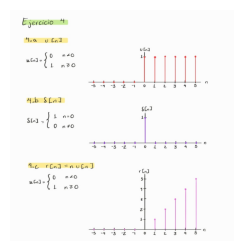

In [12]:
path = "/content/drive/MyDrive/ PD_SEÑALES/Tarea1/Img/Ejercicio1.jpeg"
img = Image.open(path)
plt.imshow(img)
plt.axis("off")


### Ejercicio 2 — Periodicidad de x[n] = cos((5π/6)n)

1) Determina si es periódica.  
2) Si lo es, encuentra su **periodo fundamental** N0.

**TODO:** explica en texto (markdown o comentarios) y verifica con una gráfica de varios periodos.


📌 Conecta con **Serie 1 #2** (periodicidad de cos(·)).

### Razonamiento
Primero identificamos la frecuencia angular:

$$
\omega_0 = \frac{5\pi}{6}
$$

Calculamos:

$$
\frac{2\pi}{\omega_0}
=
\frac{2\pi}{\frac{5\pi}{6}}
=
\frac{12}{5}
$$

Como el resultado es un **número racional**, la señal es **periódica**.

---

### Cálculo del período fundamental

$$
\frac{2\pi}{\omega_0} \ = \frac{N}{k} \
$$

Despejando $N$:

$$
N = \frac{2\pi}{\omega_0} \, k
$$

Sustituyendo:

$$
N = \frac{12}{5} \, k
$$

Para que $N$ sea entero, el valor mínimo de $k$ es 5:

$$
N = \frac{12}{5}(5) = 12
$$

---

### Resultado

$$
\boxed{N_0 = 12}
$$

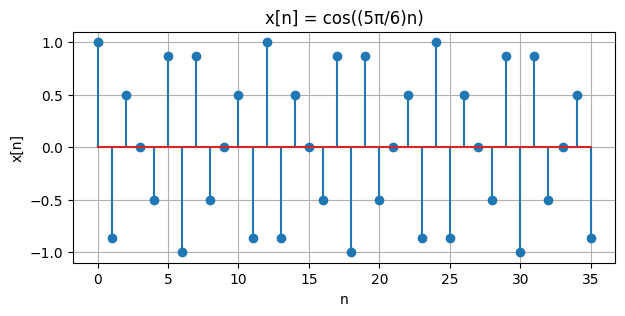

In [13]:
# Una señal discreta x[n] = cos(ω0 n) es periódica si existe un entero N>0 tal que:
#    x[n+N] = x[n]  ⇔  ω0 N = 2πk  (k entero)
# Aquí ω0 = 5π/6, entonces:
#    (5π/6)N = 2πk  →  5N = 12k
# El menor N entero ocurre con k=5, por lo que:
#    N0 = 12

# Graficar varios períodos
n = np.arange(0, 36)   # 3 períodos completos (12*3)
x = np.cos((5*np.pi/6)*n)

stem_plot(n, x, title="x[n] = cos((5π/6)n)")


## Comparando Resultados

Comparando resultados realizados a mano, observamos que nuestro código tiene un correcto funcionamiento y se pueden observar como cada 12 muestras se repite nuestra señal.

**Nota:** En el análisis manual se utilizó un intervalo reducido (−6 ≤ n ≤ 6), en el cual ya era posible observar un patrón repetitivo en la señal, abarcando un solo periodo completo.

(np.float64(-0.5), np.float64(1357.5), np.float64(843.5), np.float64(-0.5))

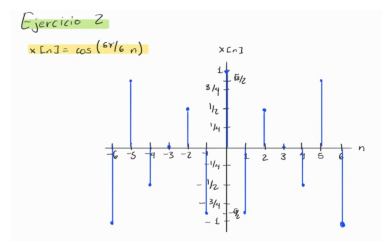

In [14]:
path = "/content/drive/MyDrive/ PD_SEÑALES/Tarea1/Img/Ejercicio2.jpeg"
img = Image.open(path)
plt.imshow(img)
plt.axis("off")



### Ejercicio 3 — Transformaciones en una secuencia finita

Dada: **x[n] = {1,2,3,4}** para n = 0,1,2,3

Calcula y grafica:
- a) x[-n]
- b) x[n-2]
- c) x[n+1]
- d) x[-n+2]
- e) x[3-n]

**Nota:** Define claramente tu eje n para cada resultado (con padding si hace falta).


## Razonamiento
Se parte de la señal base:

**x[n] = {1,2,3,4}** para n = 0,1,2,3.

Para poder visualizar correctamente las transformaciones (que pueden generar índices negativos o mayores que 3), se definió un nuevo eje n más amplio y se utilizó *padding con ceros* cuando el índice transformado quedaba fuera del rango original.

Para cada transformación:
- Se recorrió el nuevo eje n.
- Se calculó el índice transformado m.
- Si m ∈ [0,3], se asignó x[m].
- En caso contrario, se asignó 0.

---

#### a) x[-n]

- Operación: **Time reversal**
- Índice utilizado: m = -n
- Refleja la señal respecto a n = 0.

---

#### b) x[n-2]

- Operación: **Time shifting (delay 2)**
- Índice utilizado: m = n - 2
- Desplaza la señal 2 muestras hacia la derecha.

---

#### c) x[n+1]

- Operación: **Time shifting (advance 1)**
- Índice utilizado: m = n + 1
- Desplaza la señal 1 muestra hacia la izquierda.

---

#### d) x[-n+2]

- Operación: **Reversal + shifting**
- Índice utilizado: m = -n + 2
- Combina inversión temporal con desplazamiento.

---

#### e) x[3-n]

- Operación: **Reversal + shifting**
- Índice utilizado: m = 3 - n
- Refleja la señal respecto a un punto desplazado.


📌 Conecta con **Serie 1 #5–7** (x[-n], x[n±k], composiciones).

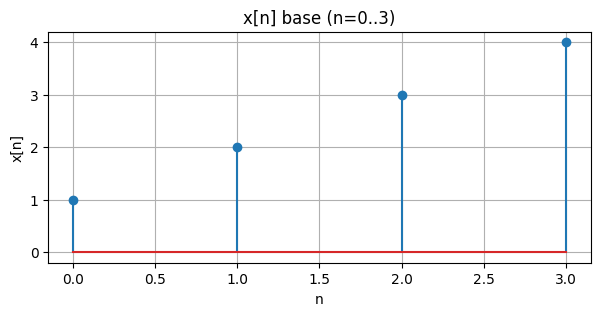

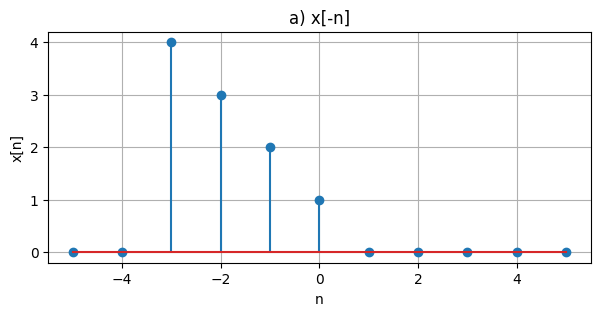

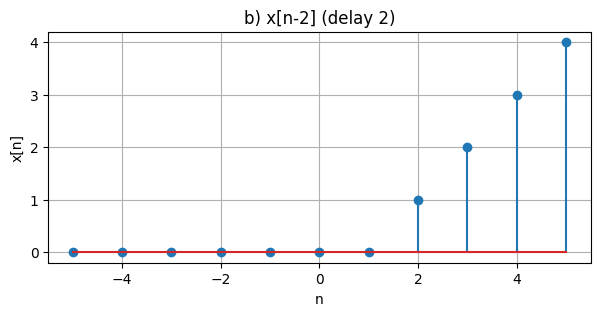

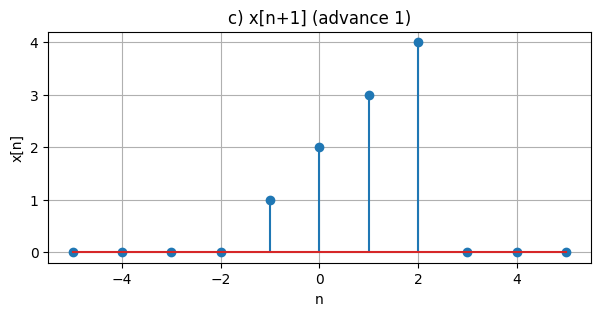

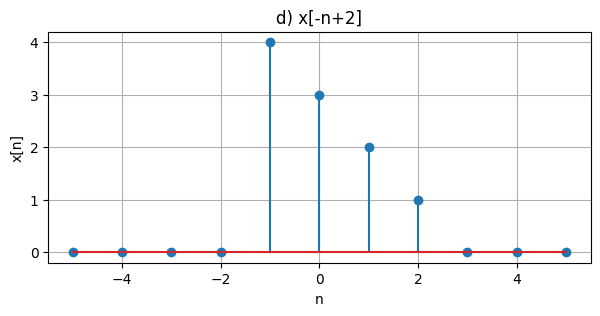

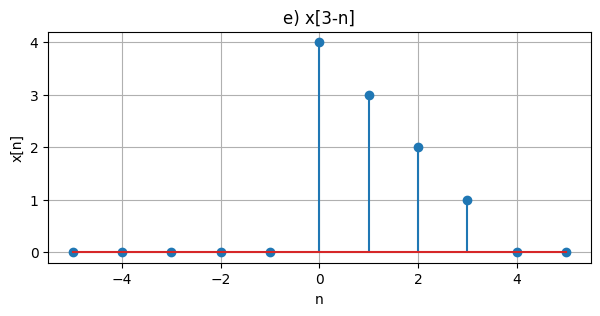

In [15]:

# Señal base
x = np.array([1, 2, 3, 4], dtype=float)     # definida para n=0,1,2,3
n_x = np.arange(0, len(x))                  # [0,1,2,3]

stem_plot(n_x, x, title="x[n] base (n=0..3)")

# Rango común para graficar (padding con ceros)
n_plot = np.arange(-5, 6)  # -5..5

# Helper: construir y[n] con padding, a partir de una regla que da el índice m de x[m]
def build_with_padding(n_vals, x, map_to_m):
    y = np.zeros(len(n_vals))
    for i in range(len(n_vals)):
        n = n_vals[i]
        m = map_to_m(n)                 # índice que pide la transformación
        if 0 <= m < len(x):             # solo si cae en 0..3 existe x[m]
            y[i] = x[m]
        else:
            y[i] = 0
    return y

# a) x[-n]  -> m = -n
y_a = build_with_padding(n_plot, x, lambda n: -n)
stem_plot(n_plot, y_a, title="a) x[-n]")

# b) x[n-2] -> m = n-2
y_b = build_with_padding(n_plot, x, lambda n: n - 2)
stem_plot(n_plot, y_b, title="b) x[n-2] (delay 2)")

# c) x[n+1] -> m = n+1
y_c = build_with_padding(n_plot, x, lambda n: n + 1)
stem_plot(n_plot, y_c, title="c) x[n+1] (advance 1)")

# d) x[-n+2] -> m = -n + 2
y_d = build_with_padding(n_plot, x, lambda n: -n + 2)
stem_plot(n_plot, y_d, title="d) x[-n+2]")

# e) x[3-n] -> m = 3 - n
y_e = build_with_padding(n_plot, x, lambda n: 3 - n)
stem_plot(n_plot, y_e, title="e) x[3-n]")


## Comparando Resultados

Comparando resultados realizados a mano, observamos que nuestro código tiene un correcto funcionamiento.

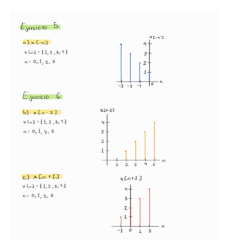

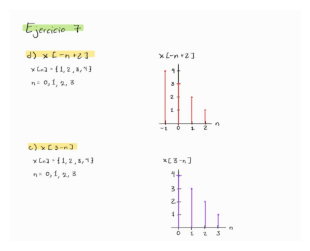

In [16]:
img1 = Image.open("/content/drive/MyDrive/ PD_SEÑALES/Tarea1/Img/Ejercicio3_1.jpeg")
img2 = Image.open("/content/drive/MyDrive/ PD_SEÑALES/Tarea1/Img/Ejercicio3_2.jpeg")

plt.imshow(img1)
plt.axis("off")
plt.show()

plt.imshow(img2)
plt.axis("off")
plt.show()

## IA (Uso y verificación)

### Prompt utilizado

> Tras recordar conceptos como Time Reversal y Time Shifting en tiempo discreto, dado x[n] = {1,2,3,4} para n=0,1,2,3, grafíca x[-n], x[n-2], x[n+1], x[-n+2], x[3-n]. Define claramente el eje n, utiliza zero padding cuando los índices queden fuera del rango original. No se pueden usar atajos como np.flip o slicing invertido,  e implementa todo mediante mapeo explícito de índices y ciclos.

---

### Comparación breve

**Coincide:**
- Las transformaciones obtenidas por IA coinciden con el análisis manual.
- Se identifican correctamente delay, advance y reversal.
- Los valores no-cero aparecen en los mismos índices que en la solución a mano.

**No coincide:**
- En papel solo se listaron los puntos donde la señal existe.
- En código se definió un eje más amplio y se aplicó padding con ceros.

**¿Por qué?**
- En el análisis manual basta con entender los índices.
- En programación es necesario definir explícitamente el dominio completo para poder graficar correctamente.


### Ejercicio 4 — Energía, media y RMS

Para x[n] = {2, -2, 2, -2} (n=0..3):

1) Calcula la **media**  
2) Calcula el **RMS**  
3) Interpreta: ¿media = 0 implica RMS = 0? (explica)

**TODO:** Implementa usando tus funciones `mean_value` y `rms`.


📌 Conecta con **Serie 1 #11** (media y RMS).

## Razonamiento
Dada la señal:

$$
x[n] = \{2, -2, 2, -2\}, \quad n=0..3
$$

### Media

La media en tiempo discreto se define como:

$$
\mu = \frac{1}{N} \sum_{n=1}^{N} x[n]
$$

Sustituyendo:

$$
\mu = \frac{1}{4}(2 - 2 + 2 - 2) = 0
$$

---

### RMS (Root Mean Square)

Se define como:

$$
\text{RMS} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} x[n]^2}
$$

Elevando al cuadrado:

$$
2^2 = 4, \quad (-2)^2 = 4
$$

$$
\sum x[n]^2 = 4+4+4+4 = 16
$$

$$
\text{RMS} = \sqrt{\frac{16}{4}} = 2
$$

---

### Interpretación

Aunque la media es 0 (por cancelación algebraica),
el RMS es 2 porque mide la magnitud energética de la señal.


In [17]:
# Para usar la raíz
import math

x = np.array([2, -2, 2, -2], dtype=float)
N = len(x) # Definimos de manera global N

# Media: sumamos cada valor del arreglo y al final lo dividimos entre N
def mean_value(x):
  total = 0
  for i in range(len(x)):
    total += x[i]
  return total/N

# RMS: elevamos al cuadrado cada valor del arreglo y al final sacamos raíz del total entre N
def rms(x):
  # N = len(x)
  total = 0
  for i in range(len(x)):
    total += x[i]**2
  return math.sqrt(total / N)

m = mean_value(x)
r = rms(x)

print("Media:", m)
print("RMS:", r)


Media: 0.0
RMS: 2.0


## Comparando Resultados

Comparando resultados realizados a mano en el razonamiento, observamos que nuestro código tiene un correcto funcionamiento.


### Ejercicio 5 — Energía (señal exponencial DT truncada)

Define una señal finita:
x[n] = (0.9)^n u[n]  para n = 0..30

1) Grafica x[n]  
2) Calcula la energía aproximada en ese intervalo (truncado)  
3) Explica qué pasaría si el intervalo fuera infinito (conceptual)

**TODO:** usa `energy(x)` y discute.


📌 Conecta con **Serie 1 #9** (energía de (0.9)^n u[n]).

## Razonamiento
Se define la señal finita:

$$
x[n] = (0.9)^n u[n], \quad n = 0..30
$$

En este intervalo, como $n \ge 0$, se cumple $u[n]=1$.  
Por lo tanto:

$$
x[n] = (0.9)^n \quad \text{para } n = 0..30
$$

La **energía truncada** en el intervalo disponible se calcula como:

$$
E_{0..30} = \sum_{n=0}^{30} |x[n]|^2
$$

Sustituyendo:

$$
E_{0..30} = \sum_{n=0}^{30} (0.9)^{2n}
$$

Como $(0.9)^n$ es una exponencial decreciente, la energía truncada es finita.

---

### Caso conceptual: intervalo infinito

Si el intervalo fuera infinito:

$$
E = \sum_{n=0}^{\infty} (0.9)^{2n}
$$

$$
E = \sum_{n=0}^{\infty} (0.81)^n
$$

Esta es una serie geométrica que converge porque:

$$
|0.81| < 1
$$

Entonces:

$$
E = \frac{1}{1 - 0.81} = \frac{100}{19}
$$

Por lo tanto, la señal tiene **energía finita** y es una *señal de energía*.

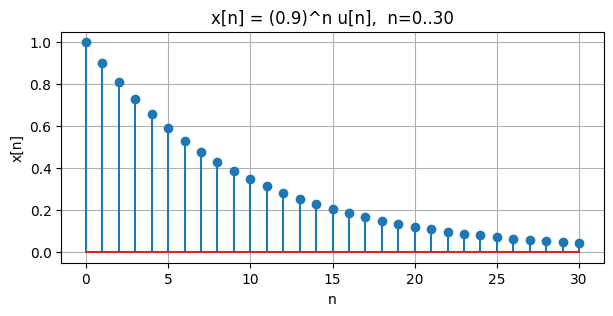

Energía truncada E_{0..30} = 5.255496956089839


In [21]:

# 1) Definir señal en n=0..30
n = np.arange(0, 31)
x = (0.9**n)  # en este rango u[n]=1

# 2) Graficar x[n]
stem_plot(n, x, title="x[n] = (0.9)^n u[n],  n=0..30")

# 3) Energía truncada en 0..30
E_trunc = energy(x)
print("Energía truncada E_{0..30} =", E_trunc)


## Comparando Resultados

Comparando resultados realizados a mano, observamos que nuestro código tiene un correcto funcionamiento.

(np.float64(-0.5), np.float64(1445.5), np.float64(733.5), np.float64(-0.5))

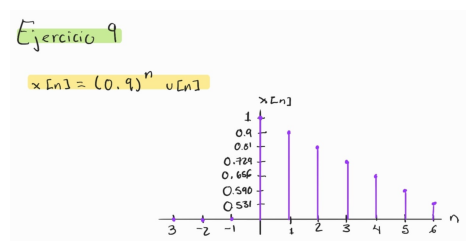

In [22]:
path = "/content/drive/MyDrive/ PD_SEÑALES/Tarea1/Img/Ejercicio5.jpeg"
img = Image.open(path)
plt.imshow(img)
plt.axis("off")

## IA (Uso y verificación)

### Prompt utilizado

> Given x[n] = (0.9)^n u[n], for n = 0..30:
> 1) Graph the signal.
> 2) Compute the truncated energy using a manual energy(x) function.
> 3) Explain conceptually what happens if the interval is infinite.
> Determine whether it is an energy or power signal.

---

### Comparación breve

**Coincide:**
- Se determinó correctamente que la señal es una señal de energía.
- Se calculó la energía truncada como suma de $(0.9)^{2n}$.
- Se explicó que la serie infinita converge porque $|0.81| < 1$.

**No coincide:**
- En el análisis manual se desarrolló la fórmula teórica de la serie geométrica.
- En el código se calculó la energía de forma numérica en el intervalo finito 0..30.

**¿Por qué?**
- Matemáticamente, la energía total se obtiene usando la suma infinita.
- Computacionalmente, se aproxima usando un intervalo truncado.
- Ambas coinciden conceptualmente porque la serie converge.


### Ejercicio 6 — Correlación (sin funciones mágicas)

x[n] = {1,2,1}  
y[n] = {1,0,-1}

1) Calcula la **autocorrelación** r_xx[k]  
2) Calcula la **correlación cruzada** r_xy[k]  
3) Grafica r_xx[k] y r_xy[k] con eje de lags k.

**TODO:** implementa `autocorr` y `crosscorr` usando loops e índices.


📌 Conecta con **Serie 1 #12** (autocorrelación y correlación cruzada).

## Razonamiento

Se tienen las señales finitas:

$$
x[n] = \{1,2,1\}, \quad n=0,1,2
$$

$$
y[n] = \{1,0,-1\}, \quad n=0,1,2
$$

Fuera de ese intervalo se asume valor 0 (*zero padding*).

---

### Definiciones utilizadas

$$
r_{xx}[k] = \sum_{n=-\infty}^{\infty} x[n]\,x[n-k]
$$

$$
r_{xy}[k] = \sum_{n=-\infty}^{\infty} x[n]\,y[n-k]
$$

Como la longitud es \(N=3\), los retardos evaluados son:

$$
k = -2, -1, 0, 1, 2
$$

Para cada valor de \(k\), solo se suman los términos donde existe traslape entre las señales.

---

## Resultados

### Autocorrelación

$$
r_{xx}[k] = \{1,\;4,\;6,\;4,\;1\}
$$

para

$$
k = \{-2,-1,0,1,2\}
$$

Observación:  
El valor máximo ocurre en \(k=0\), que corresponde a la energía de la señal:

$$
r_{xx}[0] = 6
$$

---

### Correlación cruzada

$$
r_{xy}[k] = \{-1,\;-2,\;0,\;2,\;1\}
$$

para

$$
k = \{-2,-1,0,1,2\}
$$

k = [-2 -1  0  1  2]
r_xx[k] = [1. 4. 6. 4. 1.]


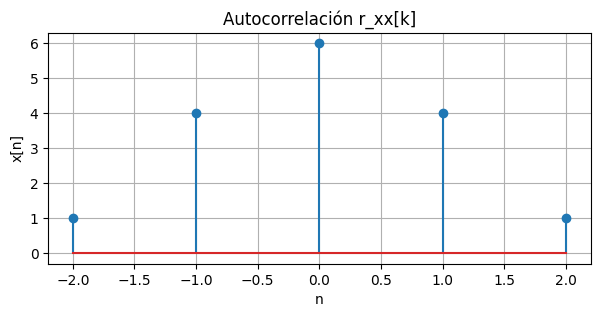

r_xy[k] = [-1. -2.  0.  2.  1.]


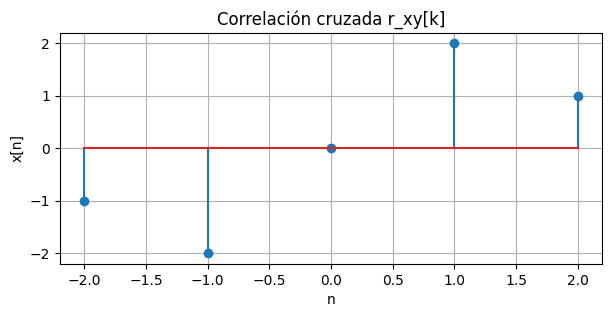

In [23]:
def autocorr(x):
    N = len(x)
    k_vals = np.arange(-(N-1), N)
    rxx = np.zeros(len(k_vals))

    for idx, k in enumerate(k_vals):
        s = 0.0
        for n in range(N):
            nk = n - k
            if 0 <= nk < N:
                s += x[n] * x[nk]
        rxx[idx] = s

    return k_vals, rxx

def crosscorr(x, y):
    N = len(x)
    k_vals = np.arange(-(N-1), N)
    rxy = np.zeros(len(k_vals))

    for idx, k in enumerate(k_vals):
        s = 0.0
        for n in range(N):
            nk = n - k
            if 0 <= nk < N:
                s += x[n] * y[nk]
        rxy[idx] = s

    return k_vals, rxy

# Señales
x = np.array([1, 2, 1], dtype=float)
y = np.array([1, 0, -1], dtype=float)

# Autocorrelación
k, rxx = autocorr(x)
print("k =", k)
print("r_xx[k] =", rxx)
stem_plot(k, rxx, title="Autocorrelación r_xx[k]")

# Correlación cruzada
k, rxy = crosscorr(x, y)
print("r_xy[k] =", rxy)
stem_plot(k, rxy, title="Correlación cruzada r_xy[k]")


## Comparando Resultados

Comparando resultados realizados a mano, observamos que nuestro código tiene un correcto funcionamiento.

(np.float64(-0.5), np.float64(1246.5), np.float64(863.5), np.float64(-0.5))

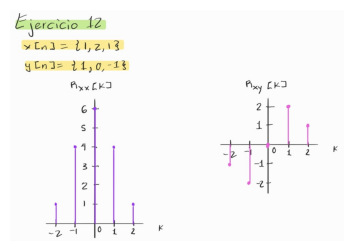

In [24]:
path = "/content/drive/MyDrive/ PD_SEÑALES/Tarea1/Img/Ejercicio6.jpeg"
img = Image.open(path)
plt.imshow(img)
plt.axis("off")

## IA (Uso y verificación)

### Prompt utilizado

> Dadas las señales discretas finitas  
> x[n] = {1,2,1} y y[n] = {1,0,-1} para n = 0..2,  
> calcula la autocorrelación r_xx[k] y la correlación cruzada r_xy[k]  
> para k = -2..2.  
> Muestra los resultados finales y proporciona código usando ciclos (sin usar funciones como np.correlate).

---

### Comparación breve

**Coincide:**
- Los resultados obtenidos con IA coinciden con el procedimiento manual.
- Se obtuvo:
  
  $$
  r_{xx}[k] = \{1,4,6,4,1\}
  $$
  
  $$
  r_{xy}[k] = \{-1,-2,0,2,1\}
  $$

- Se verificó que $r_{xx}[0] = 6$ corresponde a la energía de la señal, confirmando coherencia matemática.

**No coincide:**
- En el análisis manual se evaluó cada traslape de forma explícita para cada valor de $k$.
- En la implementación con IA se automatizó el proceso mediante ciclos y condiciones de índice.

**¿Por qué?**
- El cálculo manual permite comprender el comportamiento del traslape en cada corrimiento.
- La implementación computacional sigue la misma definición matemática, pero reduce errores aritméticos y permite verificar rápidamente todos los valores.



## 🔊 Sección Audio (extensión opcional)

**Idea:** Graba audio (con tu celular, Audacity, etc.), guarda un `.wav` y súbelo al notebook.

- En **Colab**: usa `files.upload()` (celda siguiente).
- En **Jupyter local**: coloca el `.wav` en la misma carpeta del notebook y pon el nombre en `wav_path`.

> Esta sección es para experimentar con **señales reales** usando las mismas operaciones DT.


In [ ]:

# === (Colab) Subir WAV (MISMO PATRÓN DEL EJEMPLO) ===
from google.colab import files
uploaded = files.upload()  # elige tu archivo .wav

# TODO: escribe EXACTAMENTE el nombre del archivo que subiste (tal como aparece arriba)
wav_path = "output_16k_mono.wav"

print("Usando wav_path =", wav_path)


In [ ]:

# === Cargar WAV (se mantiene simple y robusto) ===
# Intentamos soundfile primero; si no está, usamos scipy.io.wavfile.
fs = None
audio = None

audio_loaded = False

try:
    import soundfile as sf
    audio, fs = sf.read(wav_path, dtype="float32", always_2d=False)
    audio_loaded = True
except Exception as e:
    print("soundfile falló o no está instalado:", e)

if not audio_loaded:
    try:
        from scipy.io import wavfile
        fs, audio_int = wavfile.read(wav_path)

        # Si es estéreo, toma un canal (puedes cambiarlo)
        if hasattr(audio_int, "ndim") and audio_int.ndim > 1:
            audio_int = audio_int[:, 0]

        # Normaliza a float32 en [-1, 1] si viene en entero
        if np.issubdtype(audio_int.dtype, np.integer):
            max_val = np.iinfo(audio_int.dtype).max
            audio = audio_int.astype("float32") / max_val
        else:
            audio = audio_int.astype("float32")

        audio_loaded = True
    except Exception as e:
        print("No pude cargar el WAV con scipy tampoco:", e)

if audio_loaded:
    print("fs =", fs, "Hz")
    print("muestras =", len(audio))


In [ ]:

# === Visualización (muestra corta) ===
# Graficamos solo las primeras N muestras para que se vea tipo DT.
N = 500  # puedes cambiar
if audio is not None:
    n = np.arange(len(audio))
    stem_plot(n[:N], audio[:N], title=f"Primeras {N} muestras del audio")


In [ ]:

# === Experimentos sugeridos (TODO) ===
# 1) Invertir: usa time_reverse(audio_short) sobre una ventana corta (ej. primeras 2000 muestras)
# 2) Corrimiento: aplica time_shift(..., k=200) (retardo) o k=-200 (adelanto)
# 3) Energía: compara energy(x) antes/después (¿cambia? ¿por qué?)
# 4) Submuestreo manual: crea x_ds = audio[::M] (aquí SÍ se permite slicing por submuestreo)
#
# Nota: Para no hacer señales enormes, trabaja con una ventana:
# audio_w = audio[:4000]
#
# TODO: implementa aquí tus pruebas y gráficas
